# Problem Set 08

# Task 1 - Reading

Please, read through the material on alterating gradient syncrotrons. [Material - Cern](https://ab-abp-rlc.web.cern.ch/AP-literature/Courant-Snyder-1958.pdf)

## Task 2 - Make Sure You have JuliAccel.jl

get [ETHZ-gitlab/JuliAccel.jl](https://www.gitlab.ethz.ch/heinekas/juliaccel.jl)

### Task 2.2 - Build package

Then build the package. The simpliest is from the command line running the following commands: (Make sure you put in the correct directory) 

```
> julia 

julia> ]
pkg> activate /home/data/PAM/juliaccel.jl ## depends on your path
pkg> instantiate 

```


In [1]:
import Pkg

In [2]:
# TODO: use the correct path for your system

Pkg.activate("../../juliaccel.jl/")

  Activating project at `~/Polybox/ETH/ParticleAcceleratorModelling/juliaccel.jl`


In [3]:
### A basic setup


print("Importing packages... ")

#include("../juliaccel.jl/src/JuliAccel.jl")
using JuliAccel

using IJulia
using Plots
using ProgressBars

using Dates

println("Done!")


# =======================================================================

# VARIABLES

# Initial coordinates
ξi = [1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
#    [  x.  px,   y,  py,   z,  \delta]


# Dragt-Finn factorise?
symp = true


# Beamline data files
# TODO make sure they are downloaded and in the same folder as the notebook!
mad  = "pam-08.mad"
prob = "pam-08.japd"


Importing packages... Done!


"pam-08.japd"

In [4]:
# Compute maps
Ms  = JuliAccel.gen_maps(mad, prob, symplectic=true)

0.0%┣                                              ┫ 0/100 [00:00<00:00, -0s/it]
1.0%┣▍                                         ┫ 1/100 [00:04<Inf:Inf, InfGs/it]
2.0%┣█                                              ┫ 2/100 [00:06<09:40, 6s/it]
3.0%┣█▍                                             ┫ 3/100 [00:08<06:33, 4s/it]
4.0%┣█▉                                             ┫ 4/100 [00:10<05:25, 3s/it]
5.0%┣██▍                                            ┫ 5/100 [00:12<04:52, 3s/it]
6.0%┣██▉                                            ┫ 6/100 [00:14<04:32, 3s/it]
7.0%┣███▎                                           ┫ 7/100 [00:17<04:16, 3s/it]
8.0%┣███▊                                           ┫ 8/100 [00:19<04:04, 3s/it]
9.0%┣████▎                                          ┫ 9/100 [00:21<03:56, 3s/it]
10.0%┣████▌                                        ┫ 10/100 [00:23<03:48, 3s/it]
11.0%┣█████                                        ┫ 11/100 [00:25<03:42, 2s/it]
12.0%┣█████▍                

100-element Vector{Vector{TaylorN{Float64}}}:
 [ 0.9999600013333121 x + 0.009999733338666597 px + 3.999911637842656e-5 x δ - 0.00999973464378677 px δ - 2.666560715568064e-10 x δ² - 2.6665962689998175e-12 px δ² - 3.555477960782784e-15 x δ³ + 8.888655390106523e-13 px δ³ + 1.1851384122581423e-20 x δ⁴ + 1.1851542137978575e-22 px δ⁴ + 𝒪(‖x‖¹⁰),  - 0.007999786670933278 x + 0.9999600013333121 px - 1.0666099142377337e-7 x δ + 3.99987607647603e-5 px δ + 2.133277015199854e-12 x δ² - 2.666560715568064e-10 px δ² + 9.480979547013317e-18 x δ³ - 3.555446350670675e-15 px δ³ - 9.481233710300686e-23 x δ⁴ + 1.185138412258143e-20 px δ⁴ + 𝒪(‖x‖¹⁰),  0.9999600013333121 y + 0.009999733338666597 py + 3.999911637842656e-5 y δ - 0.00999973464378677 py δ - 2.666560715568064e-10 y δ² - 2.6665962689998175e-12 py δ² - 3.555477960782784e-15 y δ³ + 8.888655390106523e-13 py δ³ + 1.1851384122581423e-20 y δ⁴ + 1.1851542137978575e-22 py δ⁴ + 𝒪(‖x‖¹⁰),  - 0.007999786670933278 y + 0.9999600013333121 py - 1.0666099142377337

In [5]:
mad_parsed = JuliAccel.parse_madx(mad)
prob_set = JuliAccel.extract_model_data(prob)

ModelData("x px y py z δ", Dict{String, Integer}("order" => 9, "trunc_order" => 3, "exp_order" => 4), Dict{String, Any}[Dict("args" => [""], "expr" => "δ/β0-sqrt((1/β0+δ)^2-px^2-py^2-1/(β0*γ0)^2)", "type" => "drift"), Dict("args" => ["k1"], "expr" => "δ/β0-sqrt((1/β0+δ)^2-px^2-py^2-1/(β0^2*γ0^2))+1/2*k1*(x^2+y^2)", "type" => "quadrupole")])

## Task 3 - First steps with JuliAccel.jl

The familiarise yourselfs with JuliAccel.jl, we will look at how elments are added in JuliAccel.jl, how to use them and how a simple accelerator lattice is constructed.  


Note: make sure you placed the pam-08.japd and pam-08.mad files in the same folder as this notebook.

### Task 3.1 - Drift

The first task is to read the Hamiltonian of the drift element. It is already available you only need to use Julia to output the expression. 

Todos:
- [ ] Print the drift Hamiltonian
- [ ] generate the transfer matrix

In [6]:
### TODO print Hamiltonian
##  it is placed in the `prob_set` element

println(prob_set.hamiltonians)


Dict{String, Any}[Dict("args" => [""], "expr" => "δ/β0-sqrt((1/β0+δ)^2-px^2-py^2-1/(β0*γ0)^2)", "type" => "drift"), Dict("args" => ["k1"], "expr" => "δ/β0-sqrt((1/β0+δ)^2-px^2-py^2-1/(β0^2*γ0^2))+1/2*k1*(x^2+y^2)", "type" => "quadrupole")]


In [7]:
### TODO generate the transfer matrix
##  you can use the maps in `Ms` and the function TaylorSeries.jacobian(...) 

println(Ms)
println("Drift Space 1")
drift1 = TaylorSeries.jacobian(Ms[1])


Vector{TaylorN{Float64}}[[ 0.9999600013333121 x + 0.009999733338666597 px + 3.999911637842656e-5 x δ - 0.00999973464378677 px δ - 2.666560715568064e-10 x δ² - 2.6665962689998175e-12 px δ² - 3.555477960782784e-15 x δ³ + 8.888655390106523e-13 px δ³ + 1.1851384122581423e-20 x δ⁴ + 1.1851542137978575e-22 px δ⁴ + 𝒪(‖x‖¹⁰),  - 0.007999786670933278 x + 0.9999600013333121 px - 1.0666099142377337e-7 x δ + 3.99987607647603e-5 px δ + 2.133277015199854e-12 x δ² - 2.666560715568064e-10 px δ² + 9.480979547013317e-18 x δ³ - 3.555446350670675e-15 px δ³ - 9.481233710300686e-23 x δ⁴ + 1.185138412258143e-20 px δ⁴ + 𝒪(‖x‖¹⁰),  0.9999600013333121 y + 0.009999733338666597 py + 3.999911637842656e-5 y δ - 0.00999973464378677 py δ - 2.666560715568064e-10 y δ² - 2.6665962689998175e-12 py δ² - 3.555477960782784e-15 y δ³ + 8.888655390106523e-13 py δ³ + 1.1851384122581423e-20 y δ⁴ + 1.1851542137978575e-22 py δ⁴ + 𝒪(‖x‖¹⁰),  - 0.007999786670933278 y + 0.9999600013333121 py - 1.0666099142377337e-7 y δ + 3.9998760764

6×6 transpose(::Matrix{Float64}) with eltype Float64:
  0.99996     0.00999973   0.0         0.0         0.0  0.0
 -0.00799979  0.99996      0.0         0.0         0.0  0.0
  0.0         0.0          0.99996     0.00999973  0.0  0.0
  0.0         0.0         -0.00799979  0.99996     0.0  0.0
  0.0         0.0          0.0         0.0         1.0  2.6112e-9
  0.0         0.0          0.0         0.0         0.0  1.0

### Task 3.2 - Quadropole

Now we extend the program by a Quadropole element.

Todos:

- [ ] add the hamiltonion to the pam-08.japd mimicing the drift element
- [ ] repeat the tasks from 2.1 for the quadropole

In [8]:
### TODO: print Hamiltonion and transfer matrix
println("quadrupole 1")
quad1 = TaylorSeries.jacobian(Ms[11])

quadrupole 1


6×6 transpose(::Matrix{Float64}) with eltype Float64:
  0.99996     0.00999973   0.0         0.0         0.0  0.0
 -0.00799979  0.99996      0.0         0.0         0.0  0.0
  0.0         0.0          0.99996     0.00999973  0.0  0.0
  0.0         0.0         -0.00799979  0.99996     0.0  0.0
  0.0         0.0          0.0         0.0         1.0  2.6112e-9
  0.0         0.0          0.0         0.0         0.0  1.0

### Task 3.3 - Simple lattice 

- [ ] Create a small cell with drift space and a quadropole
- [ ] Make them repeat 50 times
- [ ] evolve a bunch through this lattice

In [9]:
### TODO the first two are again not in the notebook.

In [10]:
### TODO evolve the initial coordinates through the created lattice

N_elements = 100
ξ = [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0] for _ in 1:N_elements]
ξ[1] = ξi

for i in 2:N_elements
    ξ[i] = TaylorSeries.jacobian(Ms[i]) * ξ[i-1]  
end

x_coords_s = [ξ[i][1] for i in 1:N_elements]
px_coords_s = [ξ[i][2] for i in 1:N_elements]

100-element Vector{Float64}:
  0.0
  0.0
 -0.007999786670933278
 -0.007999786670933278
 -0.015358967512460887
 -0.015358967512460887
 -0.021488235041689334
 -0.021488235041689334
 -0.02589677060673172
 -0.02589677060673172
 -0.02823154809598318
 -0.02823154809598318
 -0.028305603515089487
  ⋮
  0.0020917392960488907
  0.0020917392960488907
 -0.00597030917798547
 -0.00597030917798547
 -0.01355426804537216
 -0.01355426804537216
 -0.02005283007902315
 -0.02005283007902315
 -0.02494560431193468
 -0.02494560431193468
 -0.027840787834292037
 -0.027840787834292037

### Task 3.4 - Symplecticity

- [ ] generate the transfer maps without Symplecticity
- [ ] compare the maps and outputs 

In [11]:
### TODO create a `Mns` similar to `Ms`, but without the symplecticity option

Mns  = JuliAccel.gen_maps(mad, prob, symplectic=false)

0.0%┣                                              ┫ 0/100 [00:00<00:00, -0s/it]
1.0%┣▍                                         ┫ 1/100 [00:00<Inf:Inf, InfGs/it]
2.0%┣█                                              ┫ 2/100 [00:01<01:27, 1it/s]
3.0%┣█▍                                             ┫ 3/100 [00:01<01:04, 2it/s]
4.0%┣█▉                                             ┫ 4/100 [00:02<00:56, 2it/s]
5.0%┣██▍                                            ┫ 5/100 [00:02<00:52, 2it/s]
6.0%┣██▉                                            ┫ 6/100 [00:03<00:49, 2it/s]
7.0%┣███▎                                           ┫ 7/100 [00:03<00:47, 2it/s]
8.0%┣███▊                                           ┫ 8/100 [00:03<00:46, 2it/s]
9.0%┣████▎                                          ┫ 9/100 [00:04<00:44, 2it/s]
10.0%┣████▌                                        ┫ 10/100 [00:04<00:43, 2it/s]
11.0%┣█████                                        ┫ 11/100 [00:05<00:42, 2it/s]
12.0%┣█████▍                

100-element Vector{Vector{TaylorN{Float64}}}:
 [ 0.9999600002666666 x + 0.009999866666666668 px + 3.99994718889966e-5 x δ - 0.00999973463889841 px δ + 2.6666673629866545e-10 x δ² - 1.3333336814933273e-7 px δ² + 𝒪(‖x‖¹⁰),  - 0.007999893333333334 x + 0.9999600002666666 px - 1.0666668059306551e-7 x δ + 3.99994718889966e-5 px δ + 2.6666673629866545e-10 px δ² + 𝒪(‖x‖¹⁰),  0.9999600002666666 y + 0.009999866666666668 py + 3.99994718889966e-5 y δ - 0.00999973463889841 py δ + 2.6666673629866545e-10 y δ² - 1.3333336814933273e-7 py δ² + 𝒪(‖x‖¹⁰),  - 0.007999893333333334 y + 0.9999600002666666 py - 1.0666668059306551e-7 y δ + 3.99994718889966e-5 py δ + 2.6666673629866545e-10 py δ² + 𝒪(‖x‖¹⁰),  1.0 z + 2.611199956259469e-9 δ - 1.0666668059306551e-7 x² + 3.999893855559364e-5 x px - 0.004999867319449205 px² - 1.0666668059306551e-7 y² + 3.999893855559364e-5 y py - 0.004999867319449205 py² - 3.916800445766561e-9 δ² + 1.0666669451946618e-9 x px δ - 1.3333336814933273e-7 px² δ + 1.0666669451946618e-9 y p

In [12]:

N_elements = 100
ξns = [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0] for _ in 1:N_elements]
ξns[1] = ξi

println(ξns[1])

for i in 2:N_elements
    ξns[i] = TaylorSeries.jacobian(Mns[i]) * ξns[i-1]  
end

x_coords_ns = [ξns[i][1] for i in 1:N_elements]
px_coords_ns = [ξns[i][2] for i in 1:N_elements]

[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]


100-element Vector{Float64}:
  0.0
  0.0
 -0.007999893333333334
 -0.007999893333333334
 -0.0153591637460195
 -0.0153591637460195
 -0.02148848871722403
 -0.02148848871722403
 -0.02589703844446853
 -0.02589703844446853
 -0.028231780970399568
 -0.028231780970399568
 -0.028305752605177845
  ⋮
  0.002089363032948134
  0.002089363032948134
 -0.0059727469451889845
 -0.0059727469451889845
 -0.013556565722070892
 -0.013556565722070892
 -0.020054789183496347
 -0.020054789183496347
 -0.024947046529578527
 -0.024947046529578527
 -0.027841571013060257
 -0.027841571013060257

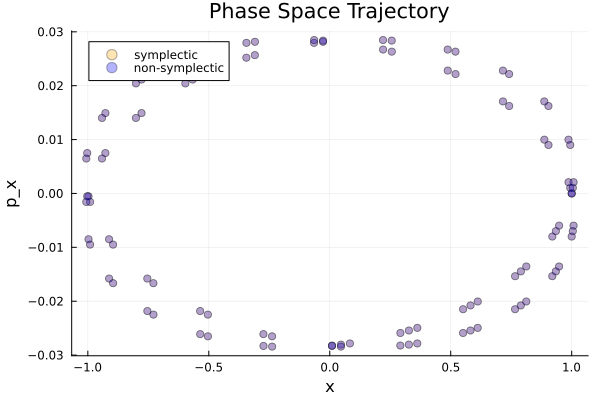

In [13]:
### TODO compare `Mns` and `Ms` using the linear maps or bunch evolution 

scat = scatter(x_coords_s, px_coords_s, color="orange", alpha=0.3, label="symplectic", xlabel="x", ylabel="p_x", title="Phase Space Trajectory")
scat = scatter!(x_coords_ns, px_coords_ns, color="blue", alpha=0.3, label="non-symplectic")


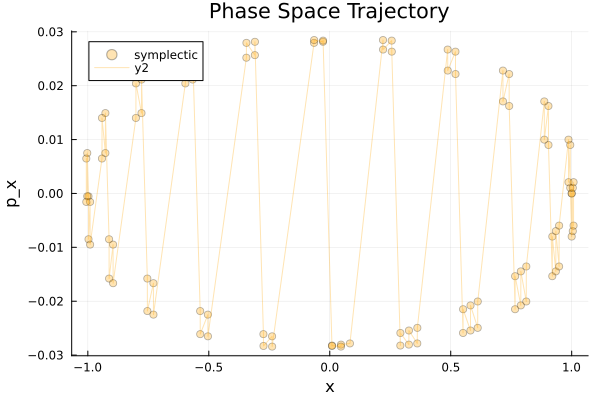

In [14]:
scat = plot(x_coords_s, px_coords_s, seriestype="scatter", color="orange", alpha=0.3, label="symplectic", xlabel="x", ylabel="p_x", title="Phase Space Trajectory")
plot!(x_coords_s, px_coords_s, seriestype="line", color="orange", alpha=0.3)

# Add the non-symplectic data with lines
# plot!(x_coords_ns, px_coords_ns, seriestype="scatter", color="blue", alpha=0.3, label="non-symplectic")
# plot!(x_coords_ns, px_coords_ns, seriestype="line", color="blue", alpha=0.3)